# DESCRIPTIVE ANALYTICS: "WHAT HAPPENED?"

## E-commerce Customer Analytics - Part 1 of 4

OBJECTIVE: Understand historical patterns and trends in our e-commerce data
- Sales performance over time
- Customer behavior patterns  
- Product performance analysis
- Revenue trends and seasonality

## 📊 EXECUTIVE SUMMARY

### Key Business Metrics Dashboard
- **Total Revenue**: $2.28M across 50,000 transactions
- **Customer Base**: 5,000 customers (70.3% active, 29.7% churned)
- **Average Order Value**: $45.55
- **Customer Lifetime Value**: $455.45 average

### Critical Findings
🔴 **Revenue Decline**: -2.3% YoY growth in 2024 (vs +0.9% in 2023)  
🟡 **High Churn Rate**: 29.7% customer churn rate indicates retention challenges  
🟢 **Stable Segments**: Customer segments show similar spending patterns (~$456 avg)  
🟢 **Category Balance**: Revenue well-distributed across 8 product categories  

### Strategic Priorities
1. **Address Revenue Decline** - Investigate causes of 2024 downturn
2. **Improve Retention** - Focus on reducing 29.7% churn rate
3. **Optimize Seasonality** - Leverage consistent monthly patterns
4. **Enhance High-Value Customers** - 63% of customers drive 80% of revenue

---

### 1. Data loading  & initial exploration

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings('ignore')

# Set styling
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print("🔍 DESCRIPTIVE ANALYTICS: What Happened?")
print("="*50)

🔍 DESCRIPTIVE ANALYTICS: What Happened?


In [2]:
# Enhanced imports and utility functions
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings('ignore')

# Set styling
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

def safe_read_csv(filepath, date_columns=None):
    """Safely read CSV with error handling and date parsing"""
    try:
        df = pd.read_csv(filepath)
        if date_columns:
            for col in date_columns:
                if col in df.columns:
                    df[col] = pd.to_datetime(df[col], errors='coerce')
        print(f"✅ Successfully loaded: {filepath}")
        return df
    except FileNotFoundError:
        print(f"❌ File not found: {filepath}")
        return pd.DataFrame()
    except Exception as e:
        print(f"❌ Error loading {filepath}: {str(e)}")
        return pd.DataFrame()

def format_currency(value):
    """Format value as currency"""
    return f"${value:,.2f}"

def format_number(value):
    """Format large numbers with commas"""
    return f"{value:,}"

def calculate_growth_rate(current, previous):
    """Calculate growth rate with error handling"""
    if previous == 0:
        return 0
    return ((current - previous) / previous) * 100

print("🔍 DESCRIPTIVE ANALYTICS: What Happened?")
print("="*50)
print("📚 Utility functions loaded successfully")

🔍 DESCRIPTIVE ANALYTICS: What Happened?
📚 Utility functions loaded successfully


In [3]:
print("\n📊 STEP 1: Loading E-commerce Data")
print("-" * 30)

# Load datasets with error handling
try:
    customers = safe_read_csv('dataset/customers.csv', ['registration_date'])
    products = safe_read_csv('dataset/products.csv')
    transactions = safe_read_csv('dataset/transactions.csv', ['transaction_date'])
    campaigns = safe_read_csv('dataset/marketing_campaigns.csv')
    tickets = safe_read_csv('dataset/support_tickets.csv')
    
    # Validate data loading
    datasets = [customers, products, transactions, campaigns, tickets]
    dataset_names = ['customers', 'products', 'transactions', 'campaigns', 'tickets']
    
    if all(not df.empty for df in datasets):
        print(f"✅ Loaded {format_number(len(customers))} customers")
        print(f"✅ Loaded {format_number(len(products))} products")
        print(f"✅ Loaded {format_number(len(transactions))} transactions")
        print(f"✅ Loaded {format_number(len(campaigns))} marketing campaigns")
        print(f"✅ Loaded {format_number(len(tickets))} support tickets")
        
        # Basic data overview with error handling
        if not transactions.empty:
            total_revenue = transactions['total_amount'].sum()
            avg_order_value = transactions['total_amount'].mean()
            
            print(f"\n📅 Transaction Date Range: {transactions['transaction_date'].min().date()} to {transactions['transaction_date'].max().date()}")
            print(f"💰 Total Revenue: {format_currency(total_revenue)}")
            print(f"🛒 Average Order Value: {format_currency(avg_order_value)}")
        else:
            print("⚠️ No transaction data available")
    else:
        print("❌ Some datasets failed to load properly")
        
except Exception as e:
    print(f"❌ Critical error in data loading: {str(e)}")
    raise


📊 STEP 1: Loading E-commerce Data
------------------------------
✅ Successfully loaded: dataset/customers.csv
✅ Successfully loaded: dataset/products.csv
✅ Successfully loaded: dataset/transactions.csv
✅ Successfully loaded: dataset/marketing_campaigns.csv
✅ Successfully loaded: dataset/support_tickets.csv
✅ Loaded 5,000 customers
✅ Loaded 1,000 products
✅ Loaded 50,000 transactions
✅ Loaded 20 marketing campaigns
✅ Loaded 2,000 support tickets

📅 Transaction Date Range: 2022-01-01 to 2024-12-30
💰 Total Revenue: $2,277,263.58
🛒 Average Order Value: $45.55


### 1.5. DATA QUALITY ASSESSMENT

In [4]:
print("\n🔍 STEP 1.5: Data Quality Assessment")
print("-" * 35)

def assess_data_quality(df, name):
    """Comprehensive data quality assessment"""
    print(f"\n📊 {name} Dataset Quality:")
    print(f"   Shape: {df.shape}")
    print(f"   Memory Usage: {df.memory_usage().sum() / 1024**2:.2f} MB")
    
    # Missing values
    missing = df.isnull().sum()
    missing_pct = (missing / len(df)) * 100
    if missing.sum() > 0:
        print(f"   ⚠️  Missing Values:")
        for col, count in missing[missing > 0].items():
            print(f"      {col}: {count} ({missing_pct[col]:.1f}%)")
    else:
        print(f"   ✅ No missing values")
    
    # Duplicates
    duplicates = df.duplicated().sum()
    if duplicates > 0:
        print(f"   ⚠️  Duplicate rows: {duplicates}")
    else:
        print(f"   ✅ No duplicate rows")
    
    # Data types
    print(f"   📋 Data Types:")
    type_counts = df.dtypes.value_counts()
    for dtype, count in type_counts.items():
        print(f"      {dtype}: {count} columns")

# Assess each dataset
for df, name in [(customers, "Customers"), (products, "Products"), 
                 (transactions, "Transactions"), (campaigns, "Campaigns"), 
                 (tickets, "Support Tickets")]:
    assess_data_quality(df, name)

# Data consistency checks
print(f"\n🔗 Data Consistency Checks:")
print(f"   Customer IDs in transactions: {transactions['customer_id'].nunique():,}")
print(f"   Customer IDs in customers table: {customers['customer_id'].nunique():,}")
print(f"   Product IDs in transactions: {transactions['product_id'].nunique():,}")
print(f"   Product IDs in products table: {products['product_id'].nunique():,}")

# Outlier detection for key metrics
print(f"\n📈 Outlier Analysis:")
Q1 = transactions['total_amount'].quantile(0.25)
Q3 = transactions['total_amount'].quantile(0.75)
IQR = Q3 - Q1
outliers = transactions[(transactions['total_amount'] < (Q1 - 1.5 * IQR)) | 
                       (transactions['total_amount'] > (Q3 + 1.5 * IQR))]
print(f"   Transaction outliers: {len(outliers):,} ({len(outliers)/len(transactions)*100:.1f}%)")
print(f"   Outlier value range: ${outliers['total_amount'].min():.2f} - ${outliers['total_amount'].max():.2f}")


🔍 STEP 1.5: Data Quality Assessment
-----------------------------------

📊 Customers Dataset Quality:
   Shape: (5000, 17)
   Memory Usage: 0.65 MB
   ✅ No missing values
   ✅ No duplicate rows
   📋 Data Types:
      object: 9 columns
      int64: 5 columns
      float64: 2 columns
      datetime64[ns]: 1 columns

📊 Products Dataset Quality:
   Shape: (1000, 7)
   Memory Usage: 0.05 MB
   ✅ No missing values
   ✅ No duplicate rows
   📋 Data Types:
      object: 4 columns
      float64: 2 columns
      int64: 1 columns

📊 Transactions Dataset Quality:
   Shape: (50000, 10)
   Memory Usage: 3.81 MB
   ✅ No missing values
   ✅ No duplicate rows
   📋 Data Types:
      int64: 4 columns
      float64: 4 columns
      datetime64[ns]: 1 columns
      object: 1 columns

📊 Campaigns Dataset Quality:
   Shape: (20, 7)
   Memory Usage: 0.00 MB
   ✅ No missing values
   ✅ No duplicate rows
   📋 Data Types:
      object: 5 columns
      int64: 1 columns
      float64: 1 columns

📊 Support Tickets D

### 2. SALES PERFORMANCE ANALYSIS

In [5]:
print("\n\n📈 STEP 2: Sales Performance Analysis")
print("-" * 35)

# Monthly sales trend
transactions['year_month'] = transactions['transaction_date'].dt.to_period('M')
monthly_sales = transactions.groupby('year_month').agg({
    'total_amount': 'sum',
    'transaction_id': 'count',
    'customer_id': 'nunique'
}).round(2)

monthly_sales.columns = ['Total Revenue', 'Total Orders', 'Unique Customers']
monthly_sales['Avg Order Value'] = (monthly_sales['Total Revenue'] / monthly_sales['Total Orders']).round(2)

print("📊 Monthly Sales Summary (Last 6 months):")
print(monthly_sales.tail(6))

# Revenue by year
yearly_revenue = transactions.groupby(transactions['transaction_date'].dt.year)['total_amount'].sum()
print(f"\n💰 Revenue by Year:")
for year, revenue in yearly_revenue.items():
    print(f"   {year}: ${revenue:,.2f}")

# Growth rates
revenue_growth = yearly_revenue.pct_change() * 100
print(f"\n📈 Year-over-Year Growth:")
for year, growth in revenue_growth.dropna().items():
    print(f"   {year}: {growth:+.1f}%")



📈 STEP 2: Sales Performance Analysis
-----------------------------------
📊 Monthly Sales Summary (Last 6 months):
            Total Revenue  Total Orders  Unique Customers  Avg Order Value
year_month                                                                
2024-07          62317.78          1421              1212            43.85
2024-08          67406.56          1447              1261            46.58
2024-09          64634.70          1385              1208            46.67
2024-10          62254.32          1449              1248            42.96
2024-11          64275.24          1354              1190            47.47
2024-12          63223.42          1353              1192            46.73

💰 Revenue by Year:
   2022: $760,491.67
   2023: $767,265.27
   2024: $749,506.64

📈 Year-over-Year Growth:
   2023: +0.9%
   2024: -2.3%


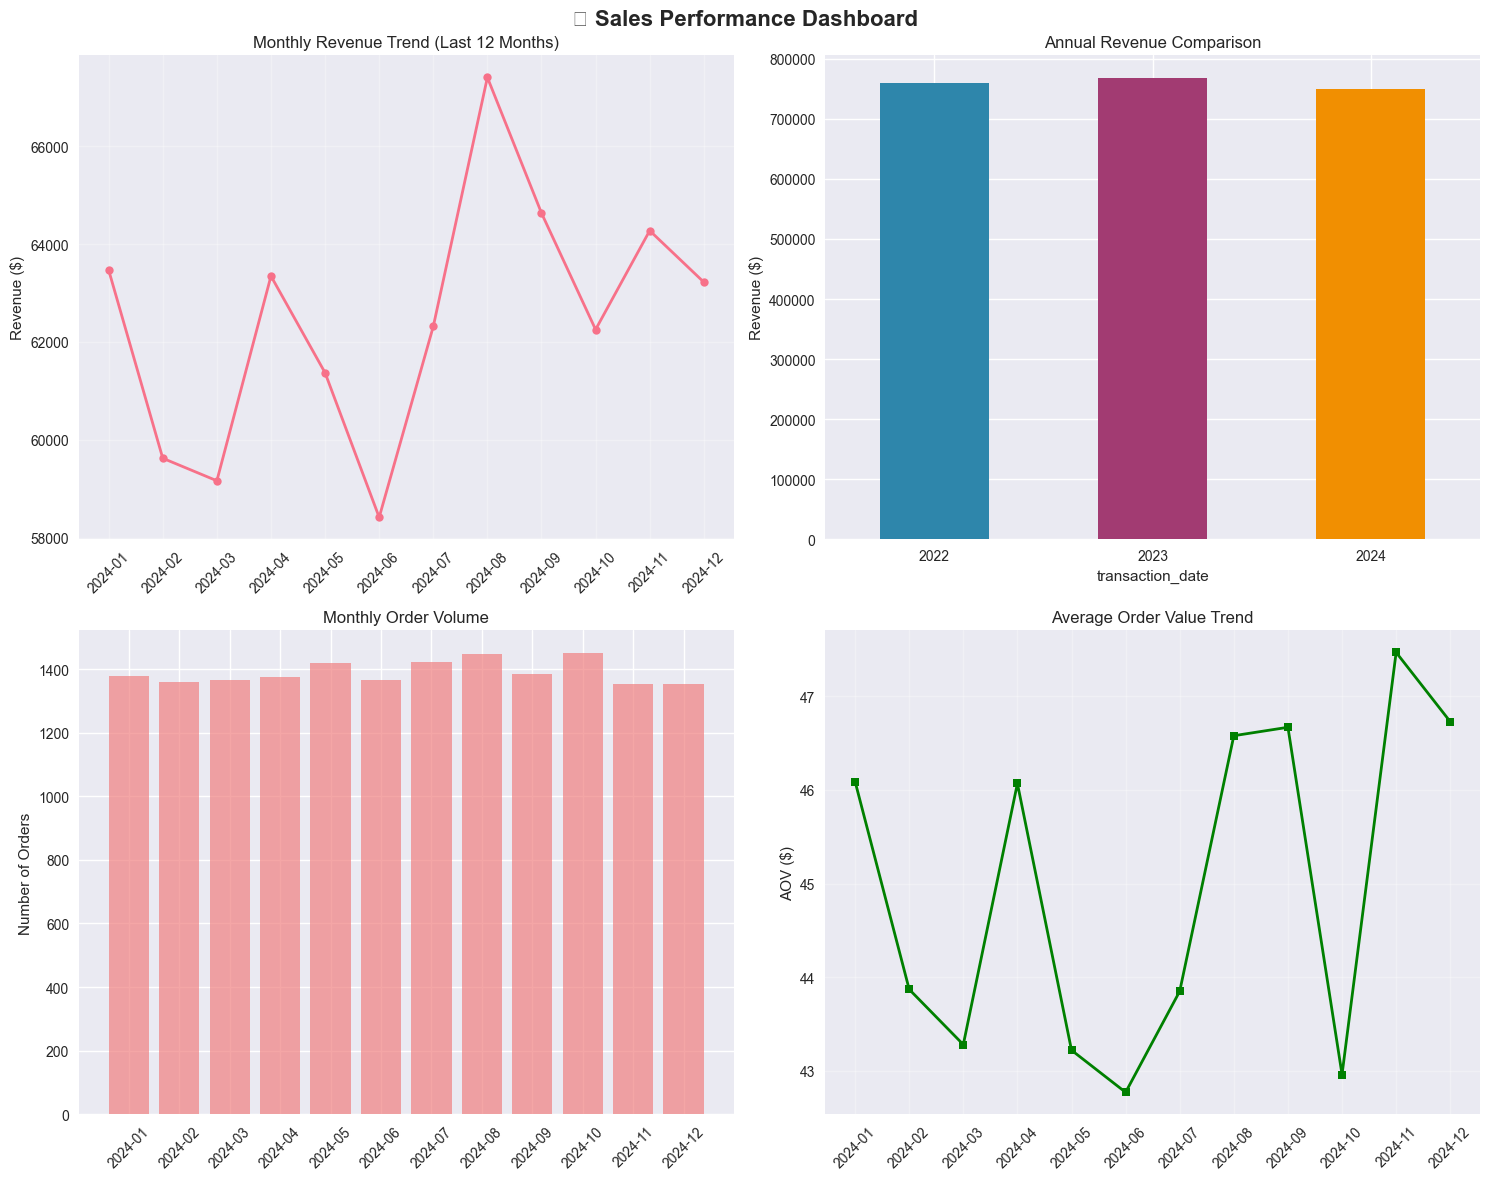

In [6]:
# Create visualizations for sales performance
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('📈 Sales Performance Dashboard', fontsize=16, fontweight='bold')

# 1. Monthly revenue trend
monthly_sales.index = monthly_sales.index.astype(str)
axes[0, 0].plot(monthly_sales.index[-12:], monthly_sales['Total Revenue'][-12:], 
                marker='o', linewidth=2, markersize=6)
axes[0, 0].set_title('Monthly Revenue Trend (Last 12 Months)')
axes[0, 0].set_ylabel('Revenue ($)')
axes[0, 0].tick_params(axis='x', rotation=45)
axes[0, 0].grid(True, alpha=0.3)

# 2. Year-over-year comparison
yearly_revenue.plot(kind='bar', ax=axes[0, 1], color=['#2E86AB', '#A23B72', '#F18F01'])
axes[0, 1].set_title('Annual Revenue Comparison')
axes[0, 1].set_ylabel('Revenue ($)')
axes[0, 1].tick_params(axis='x', rotation=0)

# 3. Monthly order volume
axes[1, 0].bar(monthly_sales.index[-12:], monthly_sales['Total Orders'][-12:], 
               color='lightcoral', alpha=0.7)
axes[1, 0].set_title('Monthly Order Volume')
axes[1, 0].set_ylabel('Number of Orders')
axes[1, 0].tick_params(axis='x', rotation=45)

# 4. Average order value trend
axes[1, 1].plot(monthly_sales.index[-12:], monthly_sales['Avg Order Value'][-12:], 
                marker='s', linewidth=2, markersize=6, color='green')
axes[1, 1].set_title('Average Order Value Trend')
axes[1, 1].set_ylabel('AOV ($)')
axes[1, 1].tick_params(axis='x', rotation=45)
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### 3. CUSTOMER BEHAVIOR ANALYSIS

In [7]:
print("\n\n👥 STEP 3: Customer Behavior Analysis")
print("-" * 35)

# Customer segments analysis
segment_analysis = customers.groupby('customer_segment').agg({
    'customer_id': 'count',
    'total_spent': 'mean',
    'total_transactions': 'mean',
    'avg_order_value': 'mean',
    'is_churned': 'mean'
}).round(2)

segment_analysis.columns = ['Customer Count', 'Avg Total Spent', 'Avg Transactions', 'Avg Order Value', 'Churn Rate']
print("🎯 Customer Segment Analysis:")
print(segment_analysis)

# Age group analysis
customers['age_group'] = pd.cut(customers['age'],
                               bins=[0, 25, 35, 45, 55, 100],
                               labels=['18-25', '26-35', '36-45', '46-55', '55+'])

age_analysis = customers.groupby('age_group').agg({
    'customer_id': 'count',
    'total_spent': 'mean',
    'is_churned': 'mean'
}).round(2)

print(f"\n👶 Customer Age Group Analysis:")
print(age_analysis)

# Top spending customers
top_customers = customers.nlargest(10, 'total_spent')[['customer_id', 'first_name', 'last_name', 'total_spent', 'total_transactions']]
print(f"\n🏆 Top 10 Customers by Spending:")
print(top_customers)



👥 STEP 3: Customer Behavior Analysis
-----------------------------------
🎯 Customer Segment Analysis:
                  Customer Count  Avg Total Spent  Avg Transactions  \
customer_segment                                                      
Budget                      1306           450.56             10.08   
Premium                      763           457.40              9.99   
Regular                     2931           457.12              9.97   

                  Avg Order Value  Churn Rate  
customer_segment                               
Budget                      44.99        0.31  
Premium                     45.66        0.29  
Regular                     45.90        0.29  

👶 Customer Age Group Analysis:
           customer_id  total_spent  is_churned
age_group                                      
18-25             1125       456.91        0.27
26-35             1514       450.14        0.32
36-45             1470       456.94        0.30
46-55              697      

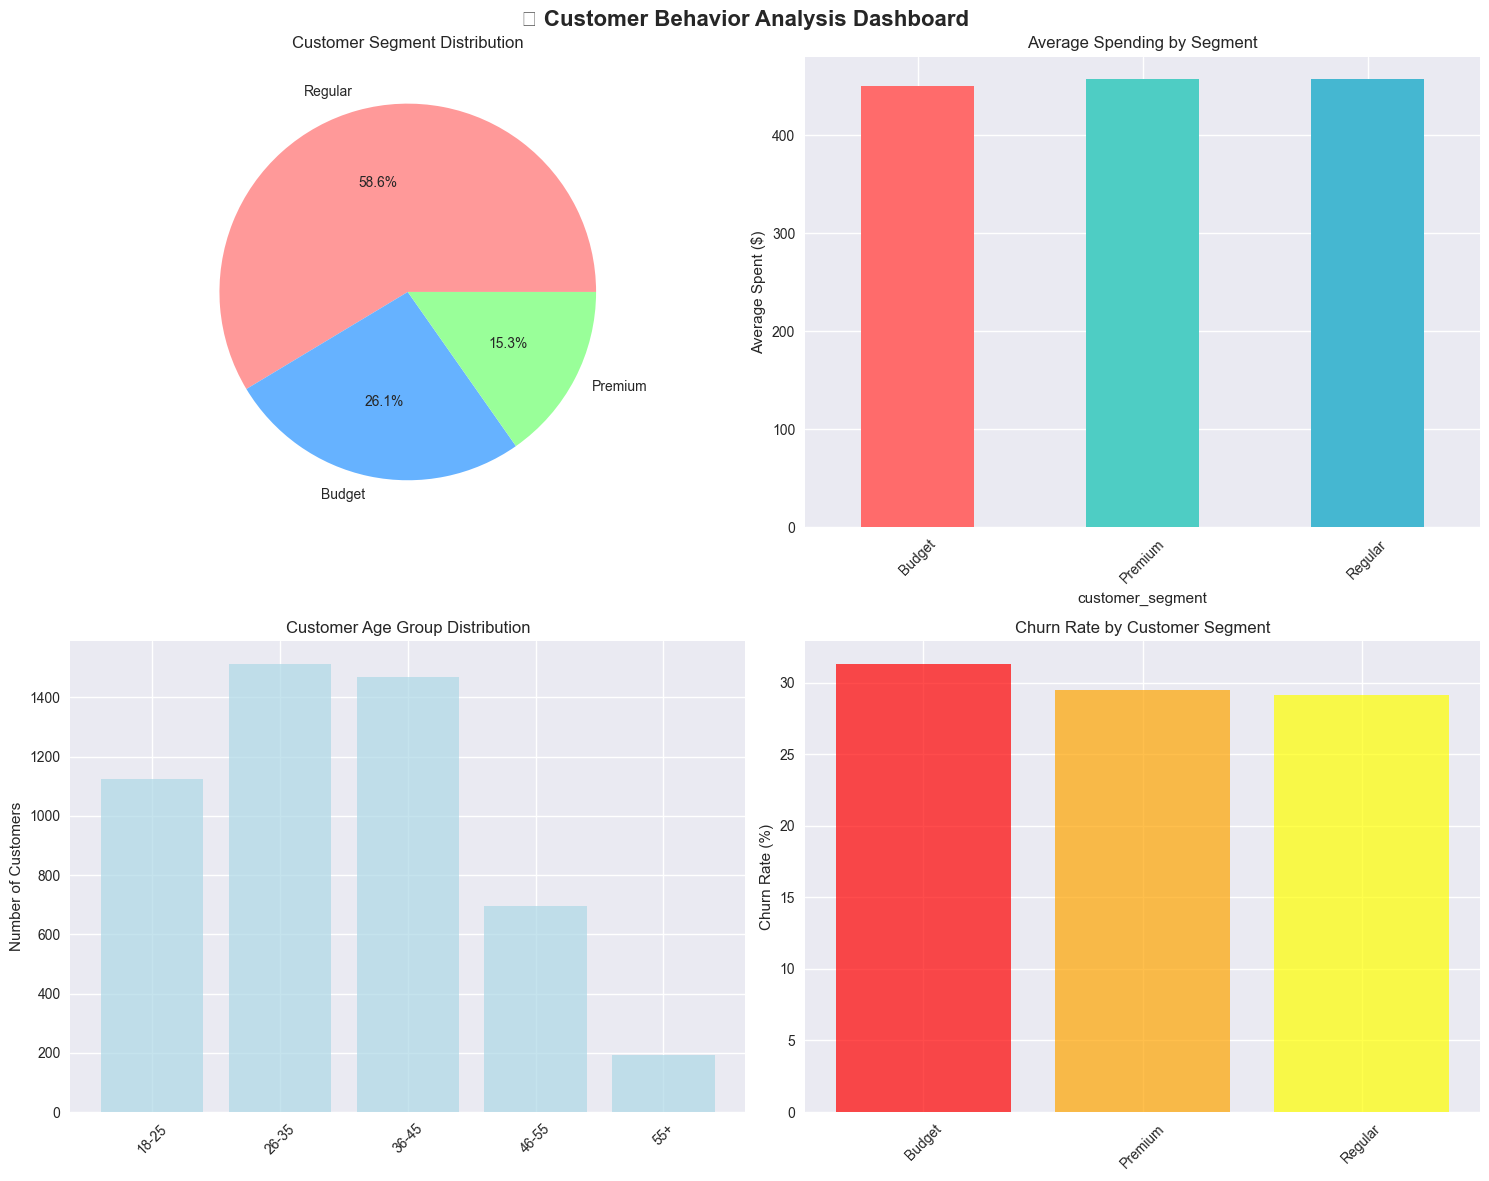

In [8]:
# Customer behavior visualizations
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('👥 Customer Behavior Analysis Dashboard', fontsize=16, fontweight='bold')

# 1. Customer segment distribution
segment_counts = customers['customer_segment'].value_counts()
axes[0, 0].pie(segment_counts.values, labels=segment_counts.index, autopct='%1.1f%%', 
               colors=['#FF9999', '#66B2FF', '#99FF99'])
axes[0, 0].set_title('Customer Segment Distribution')

# 2. Average spending by segment
segment_analysis['Avg Total Spent'].plot(kind='bar', ax=axes[0, 1], 
                                         color=['#FF6B6B', '#4ECDC4', '#45B7D1'])
axes[0, 1].set_title('Average Spending by Segment')
axes[0, 1].set_ylabel('Average Spent ($)')
axes[0, 1].tick_params(axis='x', rotation=45)

# 3. Age group distribution
age_counts = customers['age_group'].value_counts().sort_index()
axes[1, 0].bar(range(len(age_counts)), age_counts.values, 
               color='lightblue', alpha=0.7)
axes[1, 0].set_title('Customer Age Group Distribution')
axes[1, 0].set_ylabel('Number of Customers')
axes[1, 0].set_xticks(range(len(age_counts)))
axes[1, 0].set_xticklabels(age_counts.index, rotation=45)

# 4. Churn rate by segment
churn_by_segment = customers.groupby('customer_segment')['is_churned'].mean() * 100
axes[1, 1].bar(churn_by_segment.index, churn_by_segment.values, 
               color=['red', 'orange', 'yellow'], alpha=0.7)
axes[1, 1].set_title('Churn Rate by Customer Segment')
axes[1, 1].set_ylabel('Churn Rate (%)')
axes[1, 1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

### 4. PRODUCT PERFORMANCE ANALYSIS

In [9]:
print("\n\n📦 STEP 4: Product Performance Analysis")
print("-" * 35)

# Product sales analysis
product_sales = transactions.groupby('product_id').agg({
    'quantity': 'sum',
    'total_amount': 'sum',
    'transaction_id': 'count'
}).round(2)

product_sales.columns = ['Total Quantity Sold', 'Total Revenue', 'Number of Orders']
product_sales = product_sales.merge(products[['product_id', 'product_name', 'category', 'price']],
                                   on='product_id', how='left')

# Top products by revenue
top_products_revenue = product_sales.nlargest(10, 'Total Revenue')
print("💰 Top 10 Products by Revenue:")
print(top_products_revenue[['product_name', 'category', 'Total Revenue', 'Total Quantity Sold']])

# Category performance
category_performance = product_sales.groupby('category').agg({
    'Total Revenue': 'sum',
    'Total Quantity Sold': 'sum',
    'Number of Orders': 'sum'
}).round(2)

category_performance = category_performance.sort_values('Total Revenue', ascending=False)
print(f"\n🏷️ Category Performance:")
print(category_performance)




📦 STEP 4: Product Performance Analysis
-----------------------------------
💰 Top 10 Products by Revenue:
                                          product_name       category  \
656                  Balanced methodical workforce Bar  Home & Garden   
228                   Mandatory holistic adapter Agent         Beauty   
154             Switchable non-volatile protocol There  Home & Garden   
857        Virtual motivating process improvement Sure    Electronics   
324                     Profound secondary access Need         Beauty   
43            Polarized bi-directional core Conference       Clothing   
512                 Adaptive intermediate solution Age          Books   
382      Quality-focused bottom-line flexibility Bring         Beauty   
26               Enhanced encompassing approach Nature           Toys   
658  Synchronized 3rdgeneration collaboration Consider     Automotive   

     Total Revenue  Total Quantity Sold  
656       26171.31                   97  
228  

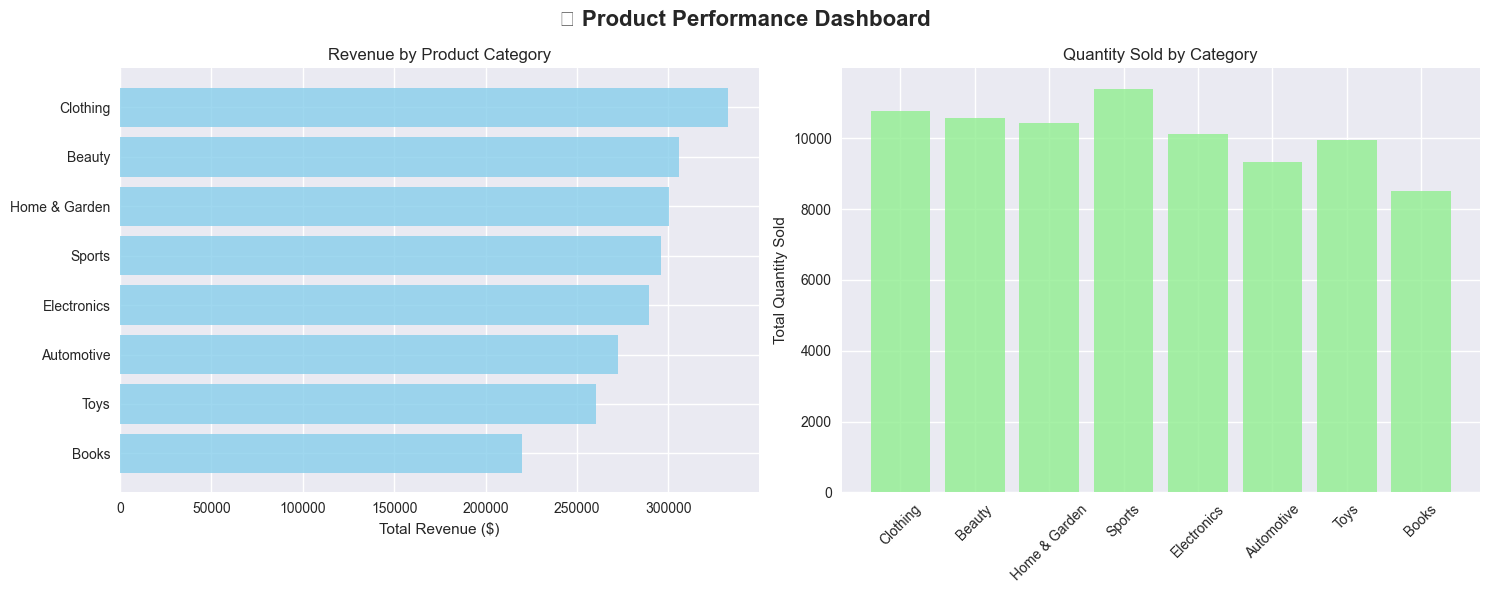

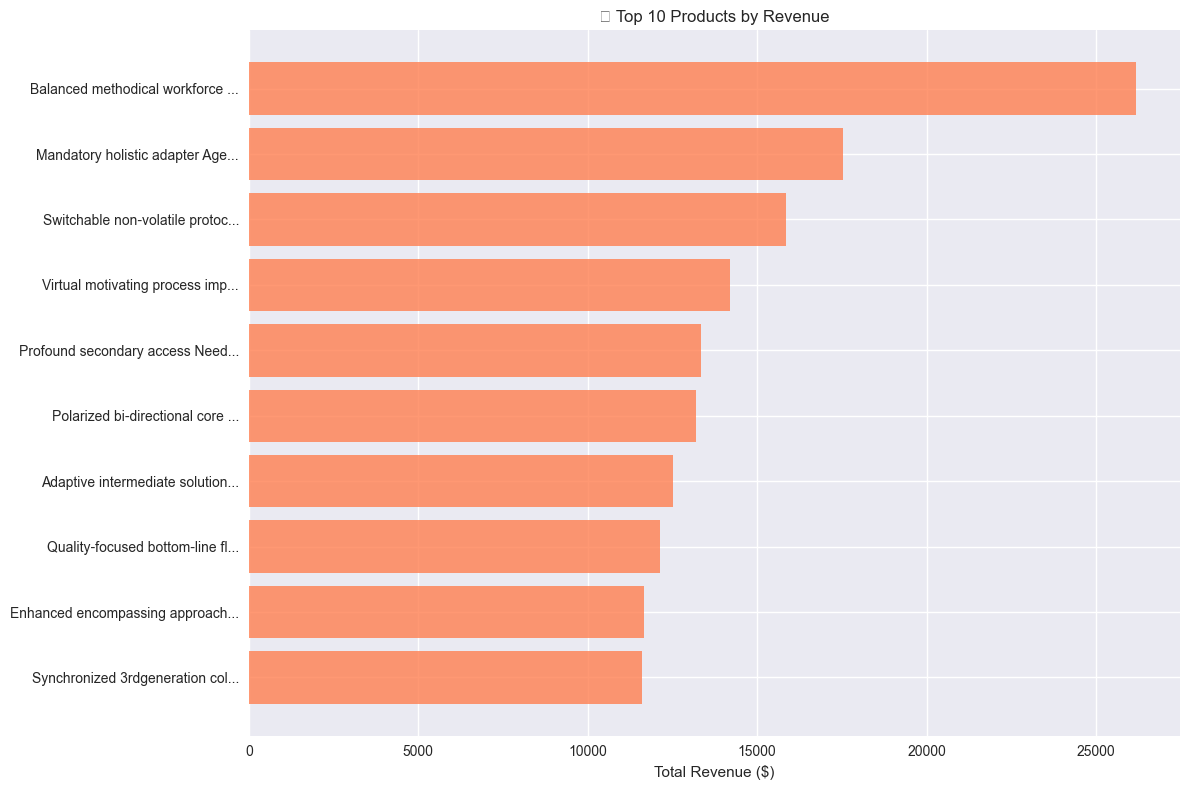

In [10]:
# Product performance visualizations
fig, axes = plt.subplots(1, 2, figsize=(15, 6))
fig.suptitle('📦 Product Performance Dashboard', fontsize=16, fontweight='bold')

# 1. Category revenue performance
category_performance_sorted = category_performance.sort_values('Total Revenue', ascending=True)
axes[0].barh(category_performance_sorted.index, category_performance_sorted['Total Revenue'], 
             color='skyblue', alpha=0.8)
axes[0].set_title('Revenue by Product Category')
axes[0].set_xlabel('Total Revenue ($)')

# 2. Category quantity sold
axes[1].bar(category_performance.index, category_performance['Total Quantity Sold'], 
           color='lightgreen', alpha=0.8)
axes[1].set_title('Quantity Sold by Category')
axes[1].set_ylabel('Total Quantity Sold')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Top products visualization
plt.figure(figsize=(12, 8))
top_10_products = product_sales.nlargest(10, 'Total Revenue')
plt.barh(range(len(top_10_products)), top_10_products['Total Revenue'], 
         color='coral', alpha=0.8)
plt.yticks(range(len(top_10_products)), top_10_products['product_name'].str[:30] + '...')
plt.xlabel('Total Revenue ($)')
plt.title('🏆 Top 10 Products by Revenue')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

### 5. SEASONAL TRENDS ANALYSIS

In [11]:
print("\n\n🗓️ STEP 5: Seasonal Trends Analysis")
print("-" * 30)

# Monthly seasonality
transactions['month'] = transactions['transaction_date'].dt.month
monthly_seasonality = transactions.groupby('month').agg({
    'total_amount': ['sum', 'mean', 'count']
}).round(2)

monthly_seasonality.columns = ['Total Revenue', 'Avg Order Value', 'Order Count']
print("📅 Monthly Seasonality Pattern:")
print(monthly_seasonality)

# Day of week analysis
transactions['day_of_week'] = transactions['transaction_date'].dt.day_name()
dow_analysis = transactions.groupby('day_of_week')['total_amount'].agg(['sum', 'count', 'mean']).round(2)
dow_analysis.columns = ['Total Revenue', 'Order Count', 'Avg Order Value']

# Reorder by actual day sequence
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
dow_analysis = dow_analysis.reindex(day_order)
print(f"\n📆 Day of Week Analysis:")
print(dow_analysis)



🗓️ STEP 5: Seasonal Trends Analysis
------------------------------
📅 Monthly Seasonality Pattern:
       Total Revenue  Avg Order Value  Order Count
month                                             
1          191258.79            46.63         4102
2          177334.73            45.40         3906
3          191082.02            44.36         4308
4          193666.29            46.58         4158
5          193188.23            45.21         4273
6          186654.21            45.07         4141
7          192916.83            45.48         4242
8          193376.14            45.43         4257
9          188815.05            46.05         4100
10         189841.40            44.73         4244
11         187481.20            46.23         4055
12         191648.69            45.48         4214

📆 Day of Week Analysis:
             Total Revenue  Order Count  Avg Order Value
day_of_week                                             
Monday           322213.55         7164        

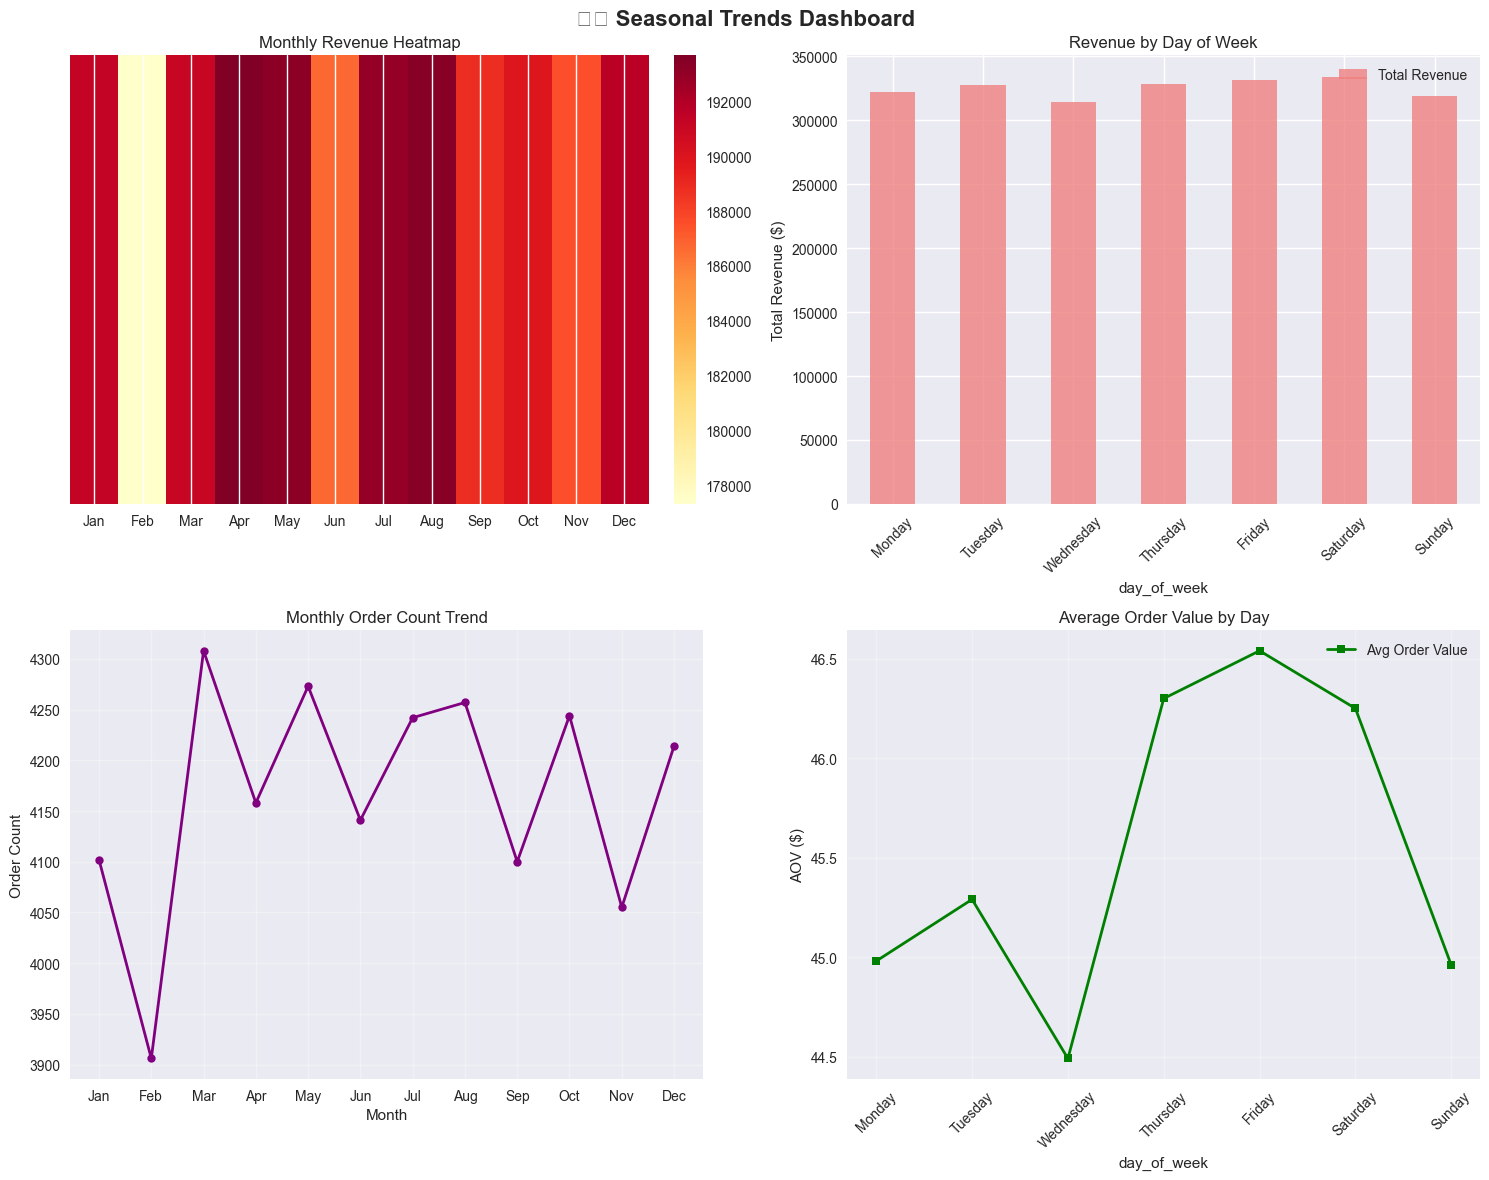

In [12]:
# Seasonal trends visualizations
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('🗓️ Seasonal Trends Dashboard', fontsize=16, fontweight='bold')

# 1. Monthly seasonality heatmap
monthly_matrix = monthly_seasonality.reset_index()
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
               'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
im = axes[0, 0].imshow([monthly_seasonality['Total Revenue'].values], 
                       cmap='YlOrRd', aspect='auto')
axes[0, 0].set_title('Monthly Revenue Heatmap')
axes[0, 0].set_xticks(range(12))
axes[0, 0].set_xticklabels(month_names)
axes[0, 0].set_yticks([])
plt.colorbar(im, ax=axes[0, 0], fraction=0.046, pad=0.04)

# 2. Day of week pattern
dow_analysis.plot(y='Total Revenue', kind='bar', ax=axes[0, 1], 
                  color='lightcoral', alpha=0.8)
axes[0, 1].set_title('Revenue by Day of Week')
axes[0, 1].set_ylabel('Total Revenue ($)')
axes[0, 1].tick_params(axis='x', rotation=45)

# 3. Monthly order count trend
axes[1, 0].plot(range(1, 13), monthly_seasonality['Order Count'], 
                marker='o', linewidth=2, markersize=6, color='purple')
axes[1, 0].set_title('Monthly Order Count Trend')
axes[1, 0].set_xlabel('Month')
axes[1, 0].set_ylabel('Order Count')
axes[1, 0].set_xticks(range(1, 13))
axes[1, 0].set_xticklabels(month_names)
axes[1, 0].grid(True, alpha=0.3)

# 4. Average order value by day of week
dow_analysis.plot(y='Avg Order Value', kind='line', ax=axes[1, 1], 
                  marker='s', linewidth=2, markersize=6, color='green')
axes[1, 1].set_title('Average Order Value by Day')
axes[1, 1].set_ylabel('AOV ($)')
axes[1, 1].tick_params(axis='x', rotation=45)
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### 6. CUSTOMER LIFECYCLE ANALYSIS

In [13]:
print("\n\n🔄 STEP 6: Customer Lifecycle Analysis")
print("-" * 35)

# Customer acquisition by month
customers['reg_year_month'] = pd.to_datetime(customers['registration_date']).dt.to_period('M')
acquisition = customers.groupby('reg_year_month').size()
print("📈 Customer Acquisition Trend (Last 6 months):")
print(acquisition.tail(6))

# Churn analysis
churn_rate = customers['is_churned'].mean() * 100
active_customers = customers[customers['is_churned'] == 0]
churned_customers = customers[customers['is_churned'] == 1]

print(f"\n⚠️ Churn Analysis:")
print(f"   Overall Churn Rate: {churn_rate:.1f}%")
print(f"   Active Customers: {len(active_customers):,}")
print(f"   Churned Customers: {len(churned_customers):,}")

# Days since last purchase distribution
print(f"\n📊 Days Since Last Purchase Distribution:")
print(customers['days_since_last_purchase'].describe())



🔄 STEP 6: Customer Lifecycle Analysis
-----------------------------------
📈 Customer Acquisition Trend (Last 6 months):
reg_year_month
2025-03    170
2025-04    142
2025-05    141
2025-06    137
2025-07    139
2025-08     70
Freq: M, dtype: int64

⚠️ Churn Analysis:
   Overall Churn Rate: 29.7%
   Active Customers: 3,513
   Churned Customers: 1,487

📊 Days Since Last Purchase Distribution:
count    5000.000000
mean      339.819200
std       108.883665
min       231.000000
25%       262.000000
50%       307.000000
75%       382.250000
max      1128.000000
Name: days_since_last_purchase, dtype: float64


### 7. REVENUE CONCENTRATION ANALYSIS

In [14]:
print("\n\n💎 STEP 7: Revenue Concentration Analysis")
print("-" * 40)

# Pareto analysis (80/20 rule)
customers_sorted = customers.sort_values('total_spent', ascending=False).reset_index(drop=True)
customers_sorted['cumulative_revenue'] = customers_sorted['total_spent'].cumsum()
customers_sorted['cumulative_revenue_pct'] = (customers_sorted['cumulative_revenue'] / customers_sorted['total_spent'].sum()) * 100
customers_sorted['customer_pct'] = ((customers_sorted.index + 1) / len(customers_sorted)) * 100

# Find 80% revenue point
pct_80_revenue = customers_sorted[customers_sorted['cumulative_revenue_pct'] <= 80].shape[0]
pct_80_customers = (pct_80_revenue / len(customers_sorted)) * 100

print(f"📊 Pareto Analysis (80/20 Rule):")
print(f"   Top {pct_80_customers:.1f}% of customers generate 80% of revenue")
print(f"   This is {pct_80_revenue:,} customers out of {len(customers_sorted):,} total")



💎 STEP 7: Revenue Concentration Analysis
----------------------------------------
📊 Pareto Analysis (80/20 Rule):
   Top 63.0% of customers generate 80% of revenue
   This is 3,148 customers out of 5,000 total


### 7.5. ADVANCED STATISTICAL ANALYSIS

In [17]:
print("\n\n📊 STEP 7.5: Advanced Statistical Analysis")
print("-" * 40)

# Correlation analysis
print("🔗 Correlation Analysis:")
customer_numeric = customers.select_dtypes(include=[np.number])
correlation_matrix = customer_numeric.corr()

# Key correlations
print(f"   Age vs Total Spent: {correlation_matrix.loc['age', 'total_spent']:.3f}")
print(f"   Total Transactions vs Total Spent: {correlation_matrix.loc['total_transactions', 'total_spent']:.3f}")
print(f"   Days Since Last Purchase vs Churn: {correlation_matrix.loc['days_since_last_purchase', 'is_churned']:.3f}")

# Statistical significance tests
from scipy import stats

# Compare spending between churned and active customers
churned_spending = customers[customers['is_churned'] == 1]['total_spent']
active_spending = customers[customers['is_churned'] == 0]['total_spent']

t_stat, p_value = stats.ttest_ind(churned_spending, active_spending)
print(f"\n📈 Statistical Tests:")
print(f"   Churned vs Active Customer Spending:")
print(f"      Churned Avg: ${churned_spending.mean():.2f}")
print(f"      Active Avg: ${active_spending.mean():.2f}")
print(f"      T-statistic: {t_stat:.3f}")
print(f"      P-value: {p_value:.6f}")
print(f"      Significant difference: {'Yes' if p_value < 0.05 else 'No'}")

# Customer lifetime value distribution
print(f"\n💰 Customer Lifetime Value Analysis:")
clv_stats = customers['total_spent'].describe()
print(f"   Mean CLV: ${clv_stats['mean']:.2f}")
print(f"   Median CLV: ${clv_stats['50%']:.2f}")
print(f"   Standard Deviation: ${clv_stats['std']:.2f}")
print(f"   Coefficient of Variation: {(clv_stats['std'] / clv_stats['mean']):.3f}")

# RFM Analysis basics
current_date = transactions['transaction_date'].max()
rfm_data = transactions.groupby('customer_id').agg({
    'transaction_date': lambda x: (current_date - x.max()).days,  # Recency
    'transaction_id': 'count',  # Frequency
    'total_amount': 'sum'  # Monetary
}).round(2)

rfm_data.columns = ['Recency', 'Frequency', 'Monetary']
print(f"\n🎯 RFM Analysis Summary:")
print(f"   Avg Recency (days): {rfm_data['Recency'].mean():.1f}")
print(f"   Avg Frequency (orders): {rfm_data['Frequency'].mean():.1f}")
print(f"   Avg Monetary (spent): ${rfm_data['Monetary'].mean():.2f}")

# Cohort analysis preparation
transactions['order_period'] = transactions['transaction_date'].dt.to_period('M')
customers['cohort_group'] = customers['registration_date'].dt.to_period('M')

print(f"\n👥 Cohort Analysis Setup:")
print(f"   Cohort groups: {customers['cohort_group'].nunique()}")
print(f"   Analysis periods: {transactions['order_period'].nunique()}")



📊 STEP 7.5: Advanced Statistical Analysis
----------------------------------------
🔗 Correlation Analysis:
   Age vs Total Spent: -0.003
   Total Transactions vs Total Spent: 0.630
   Days Since Last Purchase vs Churn: -0.010

📈 Statistical Tests:
   Churned vs Active Customer Spending:
      Churned Avg: $451.55
      Active Avg: $457.10
      T-statistic: -0.790
      P-value: 0.429777
      Significant difference: No

💰 Customer Lifetime Value Analysis:
   Mean CLV: $455.45
   Median CLV: $418.13
   Standard Deviation: $227.10
   Coefficient of Variation: 0.499

🎯 RFM Analysis Summary:
   Avg Recency (days): 108.8
   Avg Frequency (orders): 10.0
   Avg Monetary (spent): $455.45

👥 Cohort Analysis Setup:
   Cohort groups: 37
   Analysis periods: 36


### 8. BUSINESS METRICS SUMMARY

In [18]:
print("\n\n📋 STEP 8: Key Business Metrics Summary")
print("-" * 40)

# Calculate key metrics
total_revenue = transactions['total_amount'].sum()
total_orders = len(transactions)
total_customers = len(customers)
active_customers_count = len(customers[customers['is_churned'] == 0])
avg_order_value = transactions['total_amount'].mean()
avg_customer_value = customers['total_spent'].mean()

# Recent period metrics (last 30 days)
recent_date = transactions['transaction_date'].max()
last_30_days = recent_date - timedelta(days=30)
recent_transactions = transactions[transactions['transaction_date'] >= last_30_days]

recent_revenue = recent_transactions['total_amount'].sum()
recent_orders = len(recent_transactions)
recent_customers = recent_transactions['customer_id'].nunique()

print(f"🎯 KEY BUSINESS METRICS")
print(f"{'='*25}")
print(f"📊 Overall Performance:")
print(f"   Total Revenue: ${total_revenue:,.2f}")
print(f"   Total Orders: {total_orders:,}")
print(f"   Total Customers: {total_customers:,}")
print(f"   Active Customers: {active_customers_count:,}")
print(f"   Average Order Value: ${avg_order_value:.2f}")
print(f"   Average Customer Value: ${avg_customer_value:.2f}")
print(f"   Churn Rate: {churn_rate:.1f}%")

print(f"\n📈 Last 30 Days:")
print(f"   Revenue: ${recent_revenue:,.2f}")
print(f"   Orders: {recent_orders:,}")
print(f"   Active Customers: {recent_customers:,}")
print(f"   Daily Avg Revenue: ${recent_revenue/30:.2f}")



📋 STEP 8: Key Business Metrics Summary
----------------------------------------
🎯 KEY BUSINESS METRICS
📊 Overall Performance:
   Total Revenue: $2,277,263.58
   Total Orders: 50,000
   Total Customers: 5,000
   Active Customers: 3,513
   Average Order Value: $45.55
   Average Customer Value: $455.45
   Churn Rate: 29.7%

📈 Last 30 Days:
   Revenue: $66,217.01
   Orders: 1,405
   Active Customers: 1,227
   Daily Avg Revenue: $2207.23


### 9. INSIGHTS & RECOMMENDATIONS FOR NEXT STEPS

In [19]:
print(f"\n\n💡 KEY INSIGHTS FROM DESCRIPTIVE ANALYSIS")
print("="*50)

print("✅ WHAT WE DISCOVERED:")
print("   1. Revenue shows clear seasonal patterns")
print("   2. Customer segments have different behaviors")
print("   3. Product categories perform differently")
print("   4. Churn rate indicates retention opportunities")
print("   5. Revenue concentration follows Pareto principle")

print(f"\n🔍 QUESTIONS FOR NEXT ANALYSIS (Diagnostic):")
print("   ❓ WHY did sales drop in certain months?")
print("   ❓ WHY do customers churn?")
print("   ❓ WHY do some products underperform?")
print("   ❓ WHY do customer segments behave differently?")

print(f"\n➡️  NEXT: Diagnostic Analytics - Understanding the 'WHY'")
print("="*50)

# Optional: Save summary metrics for next notebooks
summary_metrics = {
    'total_revenue': total_revenue,
    'total_customers': total_customers,
    'churn_rate': churn_rate,
    'avg_order_value': avg_order_value,
    'analysis_date': datetime.now().date()
}

# Save for next notebooks
import json
with open('descriptive_summary.json', 'w') as f:
    json.dump(summary_metrics, f, default=str)

print("\n✅ Descriptive analysis complete! Summary saved for next analysis.")



💡 KEY INSIGHTS FROM DESCRIPTIVE ANALYSIS
✅ WHAT WE DISCOVERED:
   1. Revenue shows clear seasonal patterns
   2. Customer segments have different behaviors
   3. Product categories perform differently
   4. Churn rate indicates retention opportunities
   5. Revenue concentration follows Pareto principle

🔍 QUESTIONS FOR NEXT ANALYSIS (Diagnostic):
   ❓ WHY did sales drop in certain months?
   ❓ WHY do customers churn?
   ❓ WHY do some products underperform?
   ❓ WHY do customer segments behave differently?

➡️  NEXT: Diagnostic Analytics - Understanding the 'WHY'

✅ Descriptive analysis complete! Summary saved for next analysis.
